# GSEApy - Gene Set Enrichment Analysis

In [1]:
import gseapy as gp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import numpy as np
from gseapy import Msigdb
from gseapy import dotplot

## Use the *Prerank* function

Analysis used to determine whether a predefined set of genes (gene sets) shows statistically significant differences in expression in a ranked list of genes.

### 1. 5A genes from radial SVM

### Prepare the dataset for GSEA analysis
Extract just the gene names (take the first gene name in descending order of feature importance)

In [2]:
# load the shapley values associated to the features of 5A model
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/Significant features")
feature_importance_radsvm5A = pd.read_csv('shapley_values_svm_radial_5A.csv', sep=None, engine='python')
# delete the first column, that shows the index of each row
feature_importance_radsvm5A = feature_importance_radsvm5A.iloc[:, 1:]
feature_importance_radsvm5A

,col_name,feature_importance_vals
0,PIK3CA_Missense_Mutation_1046_1047,0.071663
1,PIK3CA_Missense_Mutation_545_546,0.036636
2,TP53_Missense_Mutation_270_282,0.030085
3,TP53_Nonsense_Mutation_noClust,0.029447
4,TP53_Splice_Site_noClust,0.027318
...,...,...
917,TFDP1_Frame_Shift_Del_noClust,0.000000
918,FOXA1_Missense_Mutation_254_268,0.000000
919,MEN1_Frame_Shift_Del_noClust,0.000000
920,NBN_Frame_Shift_Del_noClust,0.000000


In [3]:
# Extracting gene name
feature_importance_radsvm5A['Hugo_Symbol'] = feature_importance_radsvm5A['col_name'].str.split('_').str[0]
feature_importance_radsvm5A

,col_name,feature_importance_vals,Hugo_Symbol
0,PIK3CA_Missense_Mutation_1046_1047,0.071663,PIK3CA
1,PIK3CA_Missense_Mutation_545_546,0.036636,PIK3CA
2,TP53_Missense_Mutation_270_282,0.030085,TP53
3,TP53_Nonsense_Mutation_noClust,0.029447,TP53
4,TP53_Splice_Site_noClust,0.027318,TP53
...,...,...,...
917,TFDP1_Frame_Shift_Del_noClust,0.000000,TFDP1
918,FOXA1_Missense_Mutation_254_268,0.000000,FOXA1
919,MEN1_Frame_Shift_Del_noClust,0.000000,MEN1
920,NBN_Frame_Shift_Del_noClust,0.000000,NBN


In [4]:
feature_importance_radsvm5A['Hugo_Symbol'].nunique()

304

In [5]:
gsea_prerank_data = feature_importance_radsvm5A[['Hugo_Symbol', 'feature_importance_vals']]
gsea_prerank_data

,Hugo_Symbol,feature_importance_vals
0,PIK3CA,0.071663
1,PIK3CA,0.036636
2,TP53,0.030085
3,TP53,0.029447
4,TP53,0.027318
...,...,...
917,TFDP1,0.000000
918,FOXA1,0.000000
919,MEN1,0.000000
920,NBN,0.000000


In [6]:
# Keep only the first row for each unique gene name
gsea_prerank_data_final = gsea_prerank_data.groupby('Hugo_Symbol').first().reset_index()
gsea_prerank_data_final

,Hugo_Symbol,feature_importance_vals
0,ABCG2,0.000197
1,ACACB,0.001509
2,ACLY,0.000753
3,ACVR2A,0.000019
4,ADORA3,0.000783
...,...,...
299,ZNF230,0.000053
300,ZNF546,0.002183
301,ZNF716,0.000460
302,ZNF814,0.001013


In [7]:
gsea_prerank_data_final_resorted = gsea_prerank_data_final.sort_values(by='feature_importance_vals', ascending=False)
gsea_prerank_data_final_resorted

,Hugo_Symbol,feature_importance_vals
191,PIK3CA,0.071663
269,TP53,0.030085
7,AKT1,0.018090
100,GATA3,0.012051
65,DOCK11,0.006999
...,...,...
78,EWSR1,0.000000
183,OR6B1,0.000000
123,ITPKB,0.000000
133,KLHDC2,0.000000


In [8]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/GSEA_prerank_dataset")
gsea_prerank_data_final_resorted.to_csv('5A_radsvm_GSEA_prerank_dataset.txt', index=False, sep='\t')

In [9]:
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi/GSEA_prerank_dataset")
rnk_5A_radsvm = pd.read_csv("5A_radsvm_GSEA_prerank_dataset.rnk", header=None, index_col=0, sep="\t")
rnk_5A_radsvm

,1
0,
PIK3CA,0.071663
TP53,0.030085
AKT1,0.018090
GATA3,0.012051
DOCK11,0.006999
...,...
EWSR1,0.000000
OR6B1,0.000000
ITPKB,0.000000


In [10]:
rnk_5A_radsvm.shape

(304, 1)

### Mutational Signature Database 

In [11]:
# # run prerank
# # enrichr libraries are supported by prerank module. Just provide the name
# # use 4 process to acceralate the permutation speed
pre_res_5A_radsvm_msigDB = gp.prerank(rnk=rnk_5A_radsvm, 
                     gene_sets=['MSigDB_Computational', 'MSigDB_Oncogenic_Signatures'],
                     threads=4,
                     min_size=5,
                     max_size=10000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2024-03-25 16:35:00,652 [WARNING] Duplicated values found in preranked stats: 3.62% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-25 16:35:00,653 [INFO] Parsing data files for GSEA.............................
2024-03-25 16:35:00,656 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:00,721 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:00,769 [INFO] 0907 gene_sets have been filtered out when max_size=10000 and min_size=5
2024-03-25 16:35:00,770 [INFO] 0140 gene_sets used for further statistical testing.....
2024-03-25 16:35:00,771 [INFO] Start to run GSEA...Might take a while..................
2024-03-25 16:35:01,013 [INFO] Congratulations. GSEApy runs successfully................



*Duplicated values found in preranked stats: 85.20% of genes*: it means that multiple genes in the list have the same rank. This situation can potentially impact the results of the gene set enrichment analysis (GSEA) because, when genes have the same rank, their order in the analysis is arbitrary.

In GSEA, the enrichment score is calculated by walking down the ranked gene list, and the score increases when a gene in the gene set is encountered and decreases otherwise. When genes have the same rank, their order in the list doesn't uniquely determine which one comes first, and this can lead to multiple valid paths for calculating the enrichment score. As a result, the analysis might be influenced by the specific order of duplicated genes in your list.

In [12]:
pre_res_5A_radsvm_msigDB.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,MSigDB_Computational__MODULE 15,0.969032,1.552823,0.003109,0.430221,0.223,1/8,0.66%,TP53
1,prerank,MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE....,0.959968,1.55141,0.008247,0.231025,0.232,1/9,0.33%,PIK3CA
2,prerank,MSigDB_Computational__MODULE 95,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
3,prerank,MSigDB_Computational__MODULE 163,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
4,prerank,MSigDB_Computational__MODULE 237,0.973211,1.492559,0.017837,0.693487,0.732,2/5,2.30%,PIK3CA;MAP3K1


In [13]:
enrich_results_5A_radsvm_msigDB = pre_res_5A_radsvm_msigDB.res2d
enrich_results_5A_radsvm_msigDB

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,MSigDB_Computational__MODULE 15,0.969032,1.552823,0.003109,0.430221,0.223,1/8,0.66%,TP53
1,prerank,MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE....,0.959968,1.55141,0.008247,0.231025,0.232,1/9,0.33%,PIK3CA
2,prerank,MSigDB_Computational__MODULE 95,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
3,prerank,MSigDB_Computational__MODULE 163,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
4,prerank,MSigDB_Computational__MODULE 237,0.973211,1.492559,0.017837,0.693487,0.732,2/5,2.30%,PIK3CA;MAP3K1
...,...,...,...,...,...,...,...,...,...,...
135,prerank,MSigDB_Computational__MODULE 212,0.403058,0.638176,0.922258,0.969319,1.0,2/6,42.76%,MTHFD1;HPD
136,prerank,MSigDB_Computational__MODULE 181,0.398873,0.621654,0.959385,0.973053,1.0,2/5,47.04%,COL2A1;CDH1
137,prerank,MSigDB_Computational__MODULE 93,0.392955,0.612673,0.944873,0.971295,1.0,2/5,42.76%,MTHFD1;HPD
138,prerank,MSigDB_Computational__MODULE 117,0.387168,0.611245,0.950682,0.964959,1.0,2/7,34.21%,COL17A1;BLK


### GSEApy results - 4A XGBoost - FDR q-value < 0.75

In [14]:
enrich_results_5A_radsvm_q075_msigDB = enrich_results_5A_radsvm_msigDB.loc[enrich_results_5A_radsvm_msigDB['FDR q-val']<0.75]
enrich_results_5A_radsvm_q075_msigDB

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,MSigDB_Computational__MODULE 15,0.969032,1.552823,0.003109,0.430221,0.223,1/8,0.66%,TP53
1,prerank,MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE....,0.959968,1.55141,0.008247,0.231025,0.232,1/9,0.33%,PIK3CA
2,prerank,MSigDB_Computational__MODULE 95,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
3,prerank,MSigDB_Computational__MODULE 163,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
4,prerank,MSigDB_Computational__MODULE 237,0.973211,1.492559,0.017837,0.693487,0.732,2/5,2.30%,PIK3CA;MAP3K1
5,prerank,MSigDB_Computational__MODULE 145,0.945967,1.48401,0.030369,0.567663,0.777,1/6,0.66%,TP53
6,prerank,MSigDB_Computational__MODULE 188,0.945967,1.48401,0.030369,0.567663,0.777,1/6,0.66%,TP53
13,prerank,MSigDB_Computational__MODULE 532,0.870083,1.36787,0.094118,0.653817,0.986,3/6,10.86%,TP53;ASXL2;CHD9
14,prerank,MSigDB_Computational__MODULE 459,0.870083,1.36787,0.094118,0.653817,0.986,3/6,10.86%,TP53;ASXL2;CHD9
15,prerank,MSigDB_Computational__MODULE 317,0.870083,1.36787,0.094118,0.653817,0.986,3/6,10.86%,TP53;ASXL2;CHD9


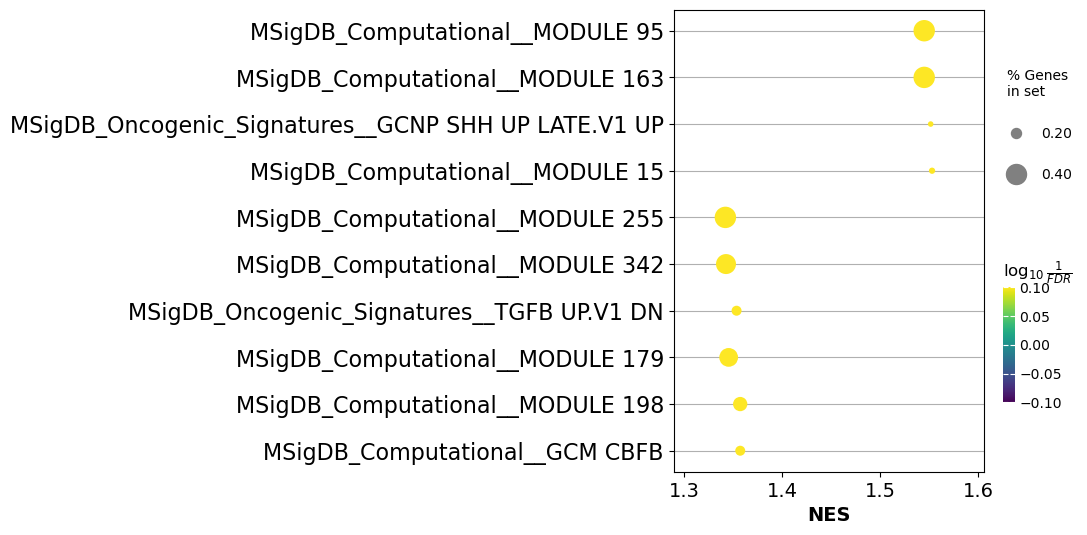

In [15]:
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(enrich_results_5A_radsvm_q075_msigDB,
             column="FDR q-val",
             #title='KEGG_2016',
             cmap=plt.cm.viridis, # colormap to be used for coloring the dots
             size=6, # adjust dot size
             figsize=(5,6), cutoff=0.75, show_ring=False)
# only the gene sets with a significance level below 'cutoff' will be shown
# each dot represents a gene set, and the color and size of the dots convey information about the significance and strength of enrichment

In [16]:
enrich_results_5A_radsvm_q075_msigDB_2 = enrich_results_5A_radsvm_q075_msigDB.set_index('Term')
enrich_results_5A_radsvm_q075_msigDB_2

,Name,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
Term,,,,,,,,,
MSigDB_Computational__MODULE 15,prerank,0.969032,1.552823,0.003109,0.430221,0.223,1/8,0.66%,TP53
MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE.V1 UP,prerank,0.959968,1.55141,0.008247,0.231025,0.232,1/9,0.33%,PIK3CA
MSigDB_Computational__MODULE 95,prerank,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
MSigDB_Computational__MODULE 163,prerank,0.966931,1.544809,0.007384,0.161975,0.302,3/7,2.63%,TP53;AKT1;VWF
MSigDB_Computational__MODULE 237,prerank,0.973211,1.492559,0.017837,0.693487,0.732,2/5,2.30%,PIK3CA;MAP3K1
MSigDB_Computational__MODULE 145,prerank,0.945967,1.48401,0.030369,0.567663,0.777,1/6,0.66%,TP53
MSigDB_Computational__MODULE 188,prerank,0.945967,1.48401,0.030369,0.567663,0.777,1/6,0.66%,TP53
MSigDB_Computational__MODULE 532,prerank,0.870083,1.36787,0.094118,0.653817,0.986,3/6,10.86%,TP53;ASXL2;CHD9
MSigDB_Computational__MODULE 459,prerank,0.870083,1.36787,0.094118,0.653817,0.986,3/6,10.86%,TP53;ASXL2;CHD9


In [17]:
### CREATE AN OCCURRENCE MATRIX WHERE THERE IS THE COUNT FOR EACH GENE OF HOW MANY TIMES IT IS PRESENT IN A GENE SET
### !! bozza

# Extract relevant columns from the dataframe
gene_sets_5A_radsvm_q075_msigDB = enrich_results_5A_radsvm_q075_msigDB_2.index.tolist()
enriched_genes_series_5A_radsvm_q075_msigDB = enrich_results_5A_radsvm_q075_msigDB['Lead_genes']

# Create a list to store all unique genes
all_genes_5A_radsvm_q075_msigDB = []

# Populate the list with genes from each gene set
for enriched_genes in enriched_genes_series_5A_radsvm_q075_msigDB:
    enriched_genes_list_5A_radsvm_q075_msigDB = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    all_genes_5A_radsvm_q075_msigDB.extend(enriched_genes_list_5A_radsvm_q075_msigDB)

# Deduplicate genes
all_genes_5A_radsvm_q075_msigDB = list(set(all_genes_5A_radsvm_q075_msigDB))

# Create an empty dataframe for the occurrence matrix
occurrence_matrix_5A_radsvm_q075_msigDB = pd.DataFrame(index=all_genes_5A_radsvm_q075_msigDB, columns=gene_sets_5A_radsvm_q075_msigDB)

# Populate the occurrence matrix with binary values
for gene_set, enriched_genes in zip(gene_sets_5A_radsvm_q075_msigDB, enriched_genes_series_5A_radsvm_q075_msigDB):
    enriched_genes_list_5A_radsvm_q075_msigDB = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    occurrence_matrix_5A_radsvm_q075_msigDB.loc[enriched_genes_list_5A_radsvm_q075_msigDB, gene_set] = 1

# Fill NaN values with 0
occurrence_matrix_5A_radsvm_q075_msigDB = occurrence_matrix_5A_radsvm_q075_msigDB.fillna(0)

# Convert the dataframe to an integer type
occurrence_matrix_5A_radsvm_q075_msigDB = occurrence_matrix_5A_radsvm_q075_msigDB.astype(int)

# Print or use the occurrence matrix as needed
print(occurrence_matrix_5A_radsvm_q075_msigDB)

          MSigDB_Computational__MODULE 15  \
CTCF                                    0   
NUP153                                  0   
BRCA2                                   0   
RB1                                     0   
NF1                                     0   
TET3                                    0   
ZFHX3                                   0   
CHD9                                    0   
ITPR3                                   0   
STAG2                                   0   
ATP8B1                                  0   
ZNF208                                  0   
GATA3                                   0   
BRCA1                                   0   
KIAA0195                                0   
VWF                                     0   
CDKN2A                                  0   
PIK3R1                                  0   
NOTCH2                                  0   
MAP3K1                                  0   
TP53                                    1   
AKT1      

In [18]:
occurrence_matrix_5A_radsvm_q075_msigDB

,MSigDB_Computational__MODULE 15,MSigDB_Oncogenic_Signatures__GCNP SHH UP LATE.V1 UP,MSigDB_Computational__MODULE 95,MSigDB_Computational__MODULE 163,MSigDB_Computational__MODULE 237,MSigDB_Computational__MODULE 145,MSigDB_Computational__MODULE 188,MSigDB_Computational__MODULE 532,MSigDB_Computational__MODULE 459,MSigDB_Computational__MODULE 317,...,MSigDB_Computational__MODULE 17,MSigDB_Computational__MODULE 2,MSigDB_Computational__MODULE 33,MSigDB_Computational__MORF PRKACA,MSigDB_Computational__MODULE 220,MSigDB_Computational__MODULE 123,MSigDB_Computational__MORF RAD51L3,MSigDB_Oncogenic_Signatures__PRC2 SUZ12 UP.V1 DN,MSigDB_Computational__MODULE 239,MSigDB_Oncogenic_Signatures__TBK1.DF UP
CTCF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
NUP153,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BRCA2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RB1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
NF1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
TET3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
ZFHX3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
CHD9,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,1
ITPR3,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
STAG2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [19]:
# how many times is a specific gene significantly enriched in a specific pathway?
occurrence_matrix_5A_radsvm_q075_msigDB_genes = occurrence_matrix_5A_radsvm_q075_msigDB.sum(axis=1)
occurrence_matrix_5A_radsvm_q075_msigDB_genes

CTCF         4
NUP153       6
BRCA2        1
RB1          2
NF1          2
TET3         1
ZFHX3        2
CHD9         7
ITPR3        3
STAG2        1
ATP8B1       4
ZNF208       1
GATA3        5
BRCA1        5
KIAA0195     1
VWF          4
CDKN2A       7
PIK3R1       1
NOTCH2       1
MAP3K1       4
TP53        12
AKT1         5
HIST1H3B     1
TNC          2
SLC4A2       2
ERBB2        4
ASXL2        7
PIK3CA       2
dtype: int64

In [20]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df = occurrence_matrix_5A_radsvm_q075_msigDB_genes.to_frame(name='EnrichmentCount')
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df

,EnrichmentCount
CTCF,4
NUP153,6
BRCA2,1
RB1,2
NF1,2
TET3,1
ZFHX3,2
CHD9,7
ITPR3,3
STAG2,1


In [21]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted = occurrence_matrix_5A_radsvm_q075_msigDB_genes_df.sort_values(by='EnrichmentCount', ascending=False)
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted

,EnrichmentCount
TP53,12
CDKN2A,7
ASXL2,7
CHD9,7
NUP153,6
AKT1,5
GATA3,5
BRCA1,5
CTCF,4
ERBB2,4


In [22]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted.shape

(28, 1)

In [23]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted['EnrichmentCount']

TP53        12
CDKN2A       7
ASXL2        7
CHD9         7
NUP153       6
AKT1         5
GATA3        5
BRCA1        5
CTCF         4
ERBB2        4
ATP8B1       4
MAP3K1       4
VWF          4
ITPR3        3
SLC4A2       2
TNC          2
PIK3CA       2
ZFHX3        2
NF1          2
RB1          2
PIK3R1       1
NOTCH2       1
ZNF208       1
STAG2        1
HIST1H3B     1
TET3         1
BRCA2        1
KIAA0195     1
Name: EnrichmentCount, dtype: int64

In [24]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted.index

Index(['TP53', 'CDKN2A', 'ASXL2', 'CHD9', 'NUP153', 'AKT1', 'GATA3', 'BRCA1',
       'CTCF', 'ERBB2', 'ATP8B1', 'MAP3K1', 'VWF', 'ITPR3', 'SLC4A2', 'TNC',
       'PIK3CA', 'ZFHX3', 'NF1', 'RB1', 'PIK3R1', 'NOTCH2', 'ZNF208', 'STAG2',
       'HIST1H3B', 'TET3', 'BRCA2', 'KIAA0195'],
      dtype='object')

In [25]:
lead_genes_5A_radsvm_q075_msigDB = np.arange(0,28,1)
enrichment_count_5A_radsvm_q075_msigDB = occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted[['EnrichmentCount']].to_numpy()

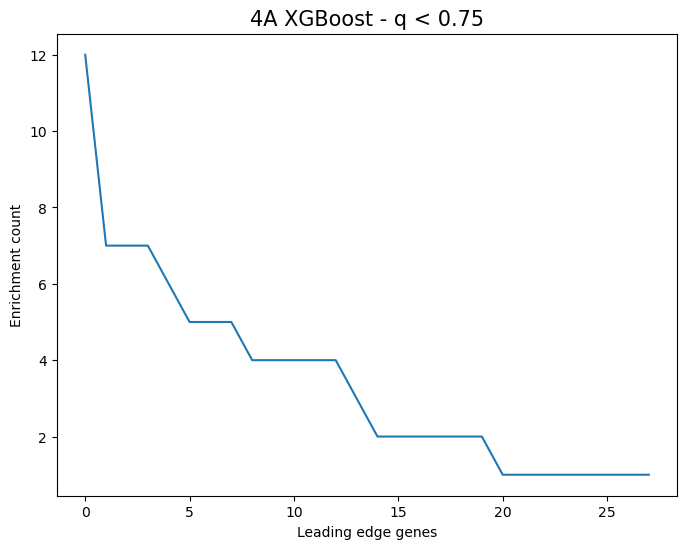

In [26]:
plt.rcParams['figure.figsize'] = (8, 6)
#plt.yscale("log") 
#set axes limit
#plt.ylim(0.001, 1000)
plt.plot(lead_genes_5A_radsvm_q075_msigDB, enrichment_count_5A_radsvm_q075_msigDB)
plt.xlabel("Leading edge genes", fontsize=10)
plt.ylabel("Enrichment count", fontsize=10)
plt.title("4A XGBoost - q < 0.75", fontsize=15)
plt.show()

In [27]:
mutated_gene_names_5A_radsvm_q075_msigDB = occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted.index.tolist()

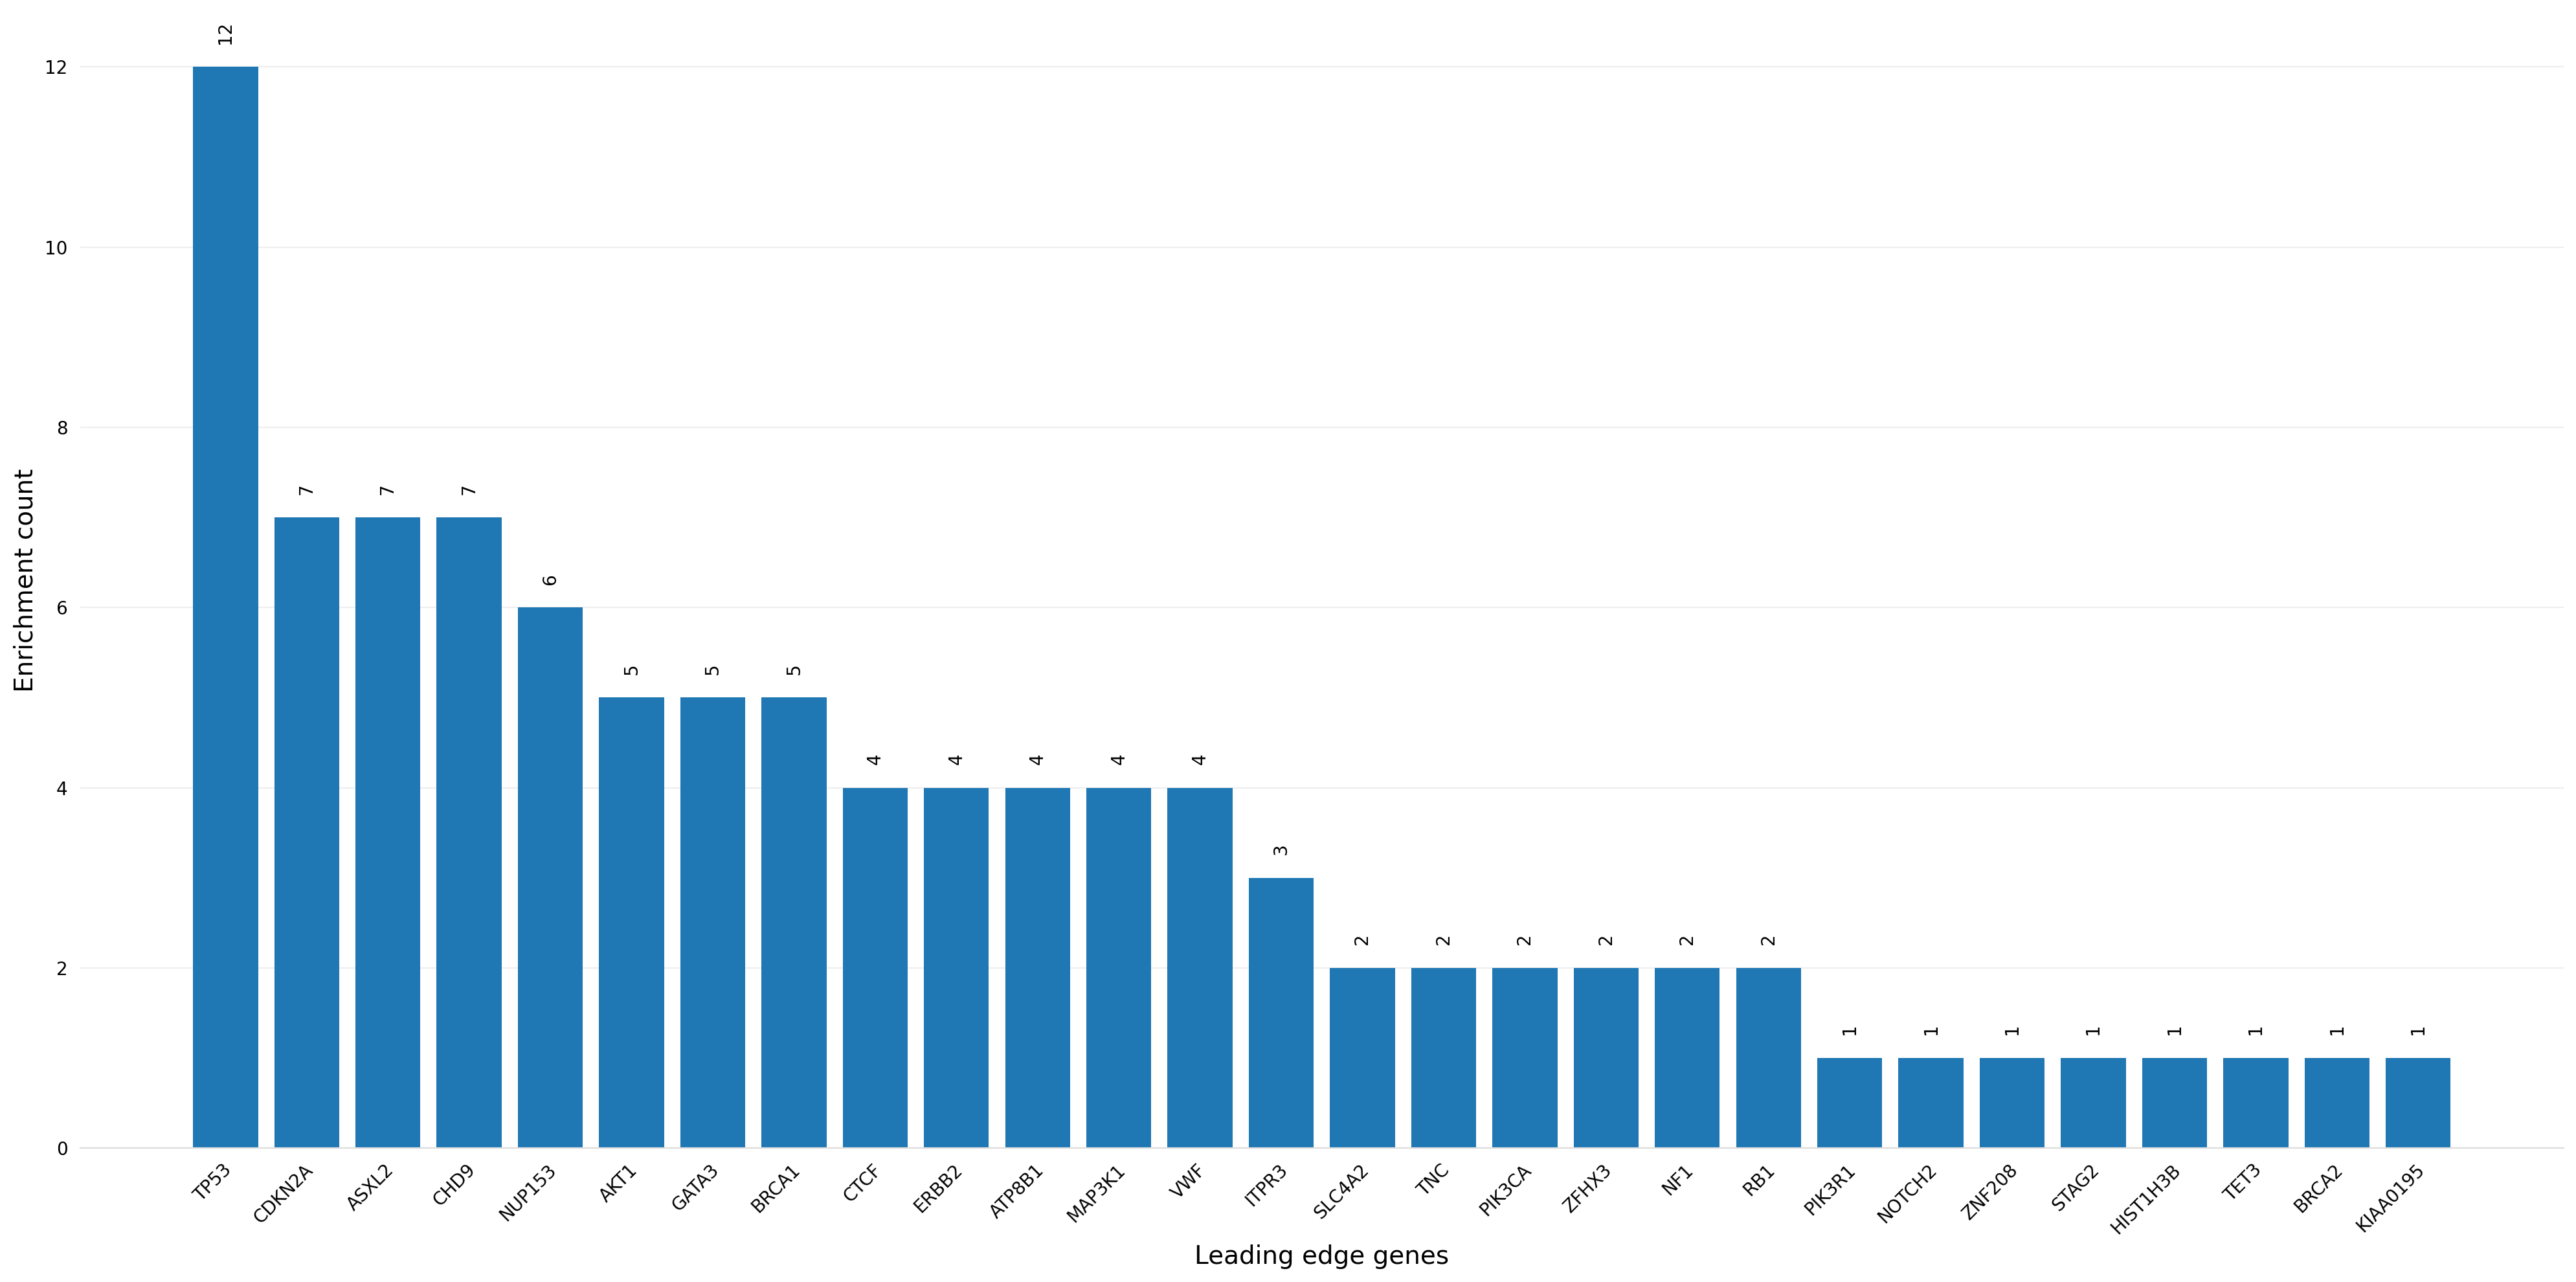

In [28]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted.index, occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted['EnrichmentCount'], label=mutated_gene_names_5A_radsvm_q075_msigDB)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_5A_radsvm_q075_msigDB,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Leading edge genes', fontsize=14)
plt.ylabel('Enrichment count', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

### KEGG, Reactome, Wikipathway

In [29]:
# # run prerank
# # enrichr libraries are supported by prerank module. Just provide the name
# # use 4 process to acceralate the permutation speed
pre_res_5A_radsvm_KEGG_react_wiki = gp.prerank(rnk=rnk_5A_radsvm, 
                     gene_sets=['KEGG_2021_Human', 'Reactome_2022', 'WikiPathway_2023_Human'],
                     threads=4,
                     min_size=5,
                     max_size=10000,
                     permutation_num=1000, # reduce number to speed up testing
                     outdir=None, # don't write to disk
                     seed=6,
                     verbose=True, # see what's going on behind the scenes
                    )

2024-03-25 16:35:03,611 [WARNING] Duplicated values found in preranked stats: 3.62% of genes
The order of those genes will be arbitrary, which may produce unexpected results.
2024-03-25 16:35:03,612 [INFO] Parsing data files for GSEA.............................
2024-03-25 16:35:03,615 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:03,643 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:03,688 [INFO] Enrichr library gene sets already downloaded in: C:\Users\Cristina\.cache/gseapy, use local file
2024-03-25 16:35:03,736 [INFO] 2573 gene_sets have been filtered out when max_size=10000 and min_size=5
2024-03-25 16:35:03,737 [INFO] 0366 gene_sets used for further statistical testing.....
2024-03-25 16:35:03,737 [INFO] Start to run GSEA...Might take a while..................
2024-03-25 16:35:04,154 [INFO] Congratulations. GSEApy runs successfully.

*Duplicated values found in preranked stats: 85.20% of genes*: it means that multiple genes in the list have the same rank. This situation can potentially impact the results of the gene set enrichment analysis (GSEA) because, when genes have the same rank, their order in the analysis is arbitrary.

In GSEA, the enrichment score is calculated by walking down the ranked gene list, and the score increases when a gene in the gene set is encountered and decreases otherwise. When genes have the same rank, their order in the list doesn't uniquely determine which one comes first, and this can lead to multiple valid paths for calculating the enrichment score. As a result, the analysis might be influenced by the specific order of duplicated genes in your list.

In [30]:
pre_res_5A_radsvm_KEGG_react_wiki.res2d.head(5)

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Reactome_2022__Hemostasis R-HSA-109582,0.971308,1.577449,0.001015,0.386063,0.139,7/12,2.96%,PIK3CA;TP53;AKT1;GATA3;DOCK11;VWF;ITPR3
1,prerank,KEGG_2021_Human__Measles,0.973355,1.563743,0.004175,0.459748,0.26,3/8,0.99%,PIK3CA;TP53;AKT1
2,prerank,Reactome_2022__Signaling By Interleukins R-HSA...,0.96257,1.560164,0.001002,0.371188,0.293,4/14,1.32%,PIK3CA;TP53;AKT1;GATA3
3,prerank,KEGG_2021_Human__Amyotrophic lateral sclerosis,0.956723,1.558058,0.009278,0.307709,0.315,3/9,3.29%,TP53;ITPR3;NUP153
4,prerank,KEGG_2021_Human__Hepatitis C,0.949801,1.556875,0.015496,0.26381,0.325,3/9,0.99%,PIK3CA;TP53;AKT1


In [31]:
enrich_results_5A_radsvm_KEGG_react_wiki = pre_res_5A_radsvm_KEGG_react_wiki.res2d
enrich_results_5A_radsvm_KEGG_react_wiki

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Reactome_2022__Hemostasis R-HSA-109582,0.971308,1.577449,0.001015,0.386063,0.139,7/12,2.96%,PIK3CA;TP53;AKT1;GATA3;DOCK11;VWF;ITPR3
1,prerank,KEGG_2021_Human__Measles,0.973355,1.563743,0.004175,0.459748,0.26,3/8,0.99%,PIK3CA;TP53;AKT1
2,prerank,Reactome_2022__Signaling By Interleukins R-HSA...,0.96257,1.560164,0.001002,0.371188,0.293,4/14,1.32%,PIK3CA;TP53;AKT1;GATA3
3,prerank,KEGG_2021_Human__Amyotrophic lateral sclerosis,0.956723,1.558058,0.009278,0.307709,0.315,3/9,3.29%,TP53;ITPR3;NUP153
4,prerank,KEGG_2021_Human__Hepatitis C,0.949801,1.556875,0.015496,0.26381,0.325,3/9,0.99%,PIK3CA;TP53;AKT1
...,...,...,...,...,...,...,...,...,...,...
361,prerank,WikiPathway_2023_Human__Non Genomic Actions Of...,0.454849,0.710553,0.884234,0.897999,1.0,4/5,54.93%,KRAS;STAT2;SP3;JAK1
362,prerank,KEGG_2021_Human__Spliceosome,0.462245,0.708534,0.865132,0.892558,1.0,2/5,45.07%,SF3B1;SF3B3
363,prerank,Reactome_2022__mRNA Splicing R-HSA-72172,0.462245,0.708534,0.865132,0.892558,1.0,2/5,45.07%,SF3B1;SF3B3
364,prerank,Reactome_2022__mRNA Splicing - Major Pathway R...,0.462245,0.708534,0.865132,0.892558,1.0,2/5,45.07%,SF3B1;SF3B3


### GSEApy results - 5A radial SVM - FDR q-value < 0.75

In [32]:
enrich_results_5A_radsvm_q075_KEGG_react_wiki = enrich_results_5A_radsvm_KEGG_react_wiki.loc[enrich_results_5A_radsvm_KEGG_react_wiki['FDR q-val']<0.75]
enrich_results_5A_radsvm_q075_KEGG_react_wiki

,Name,Term,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
0,prerank,Reactome_2022__Hemostasis R-HSA-109582,0.971308,1.577449,0.001015,0.386063,0.139,7/12,2.96%,PIK3CA;TP53;AKT1;GATA3;DOCK11;VWF;ITPR3
1,prerank,KEGG_2021_Human__Measles,0.973355,1.563743,0.004175,0.459748,0.26,3/8,0.99%,PIK3CA;TP53;AKT1
2,prerank,Reactome_2022__Signaling By Interleukins R-HSA...,0.96257,1.560164,0.001002,0.371188,0.293,4/14,1.32%,PIK3CA;TP53;AKT1;GATA3
3,prerank,KEGG_2021_Human__Amyotrophic lateral sclerosis,0.956723,1.558058,0.009278,0.307709,0.315,3/9,3.29%,TP53;ITPR3;NUP153
4,prerank,KEGG_2021_Human__Hepatitis C,0.949801,1.556875,0.015496,0.26381,0.325,3/9,0.99%,PIK3CA;TP53;AKT1
...,...,...,...,...,...,...,...,...,...,...
344,prerank,Reactome_2022__Mitotic Metaphase And Anaphase ...,0.651453,1.012219,0.478309,0.481126,1.0,2/5,28.62%,STAG2;ZW10
345,prerank,Reactome_2022__Mitotic Anaphase R-HSA-68882,0.651453,1.012219,0.478309,0.481126,1.0,2/5,28.62%,STAG2;ZW10
346,prerank,WikiPathway_2023_Human__Male Infertility WP4673,0.602877,0.969862,0.518634,0.551991,1.0,4/8,30.26%,BRCA2;USP8;MTHFD1;ATM
348,prerank,KEGG_2021_Human__Thermogenesis,0.576008,0.897064,0.658129,0.674993,1.0,3/5,36.18%,TSC1;ARID1A;KRAS


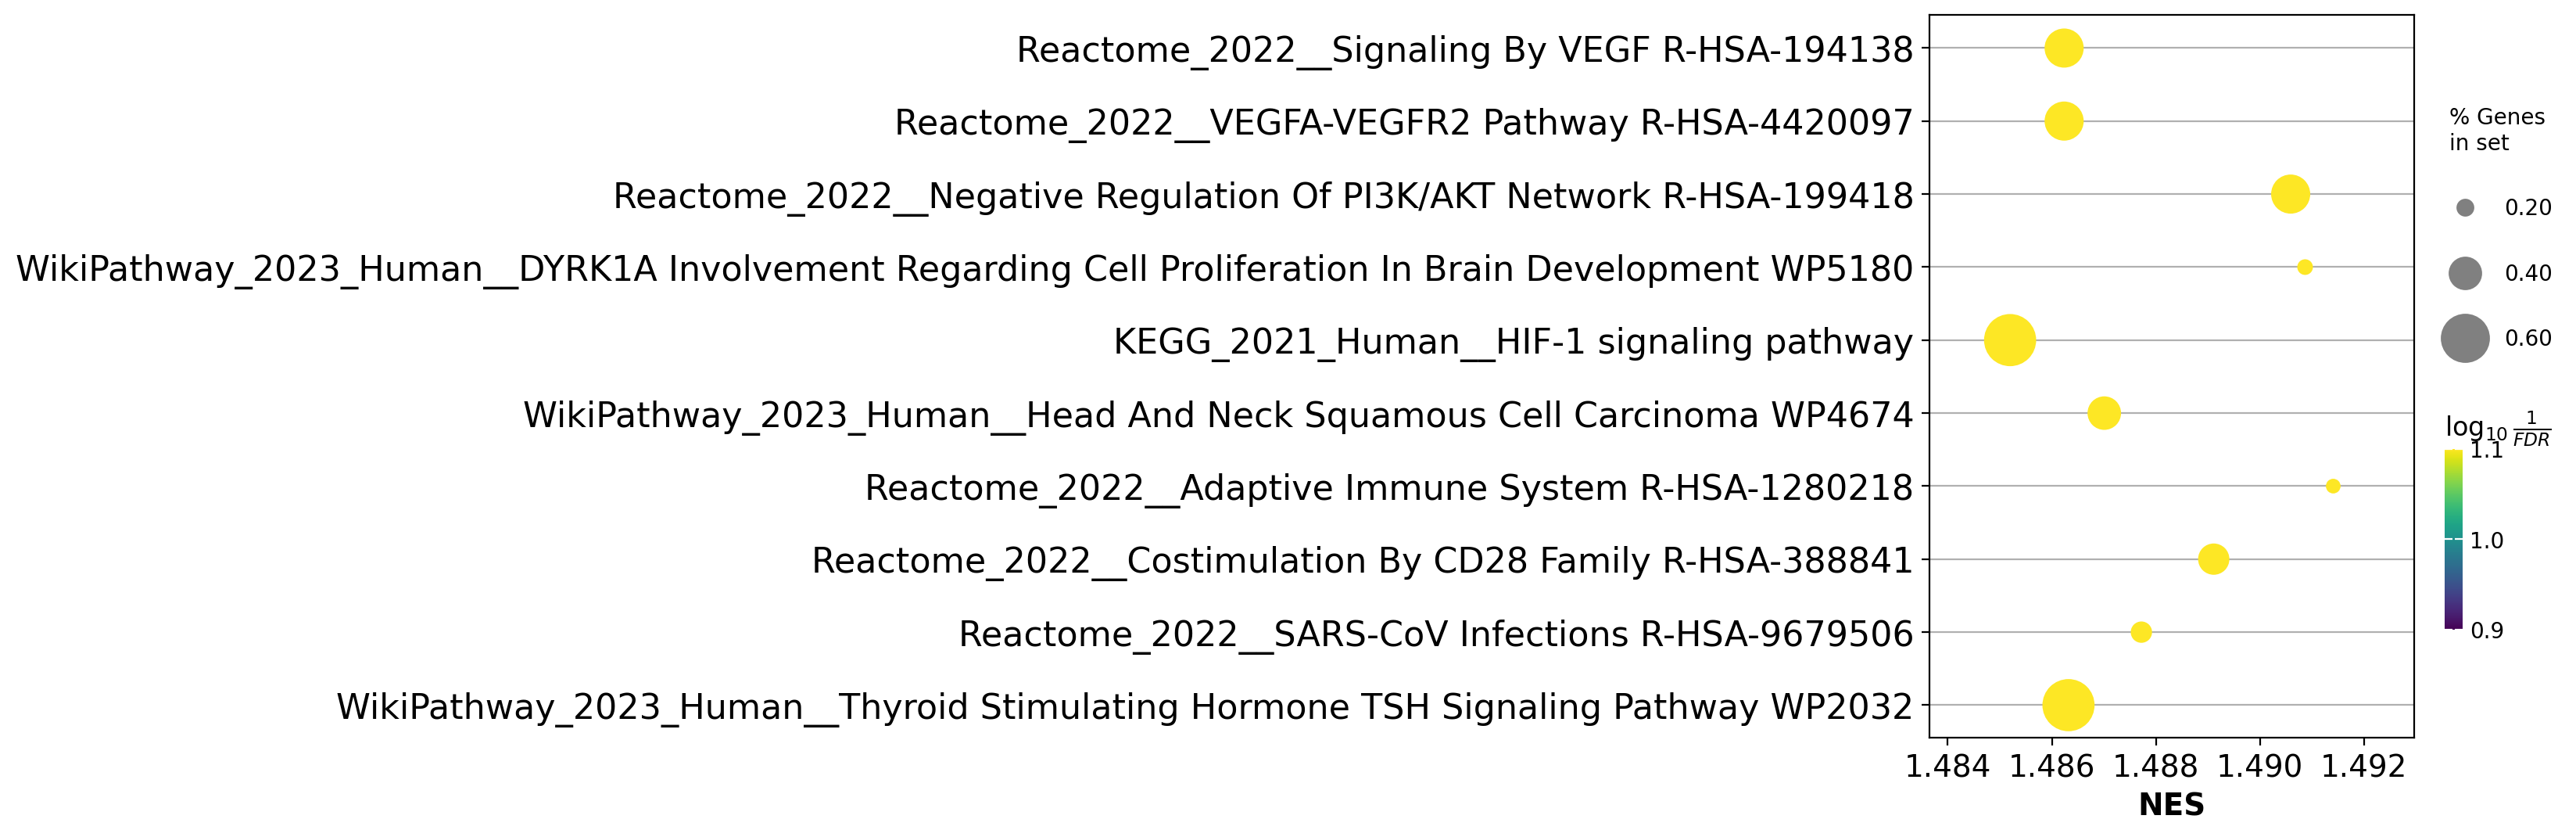

In [33]:
# to save your figure, make sure that ``ofname`` is not None
ax = dotplot(enrich_results_5A_radsvm_q075_KEGG_react_wiki,
             column="FDR q-val",
             #title='KEGG_2016',
             cmap=plt.cm.viridis, # colormap to be used for coloring the dots
             size=6, # adjust dot size
             figsize=(5,6), cutoff=0.75, show_ring=False)
# only the gene sets with a significance level below 'cutoff' will be shown
# each dot represents a gene set, and the color and size of the dots convey information about the significance and strength of enrichment

In [34]:
enrich_results_5A_radsvm_q075_KEGG_react_wiki_2 = enrich_results_5A_radsvm_q075_KEGG_react_wiki.set_index('Term')
enrich_results_5A_radsvm_q075_KEGG_react_wiki_2

,Name,ES,NES,NOM p-val,FDR q-val,FWER p-val,Tag %,Gene %,Lead_genes
Term,,,,,,,,,
Reactome_2022__Hemostasis R-HSA-109582,prerank,0.971308,1.577449,0.001015,0.386063,0.139,7/12,2.96%,PIK3CA;TP53;AKT1;GATA3;DOCK11;VWF;ITPR3
KEGG_2021_Human__Measles,prerank,0.973355,1.563743,0.004175,0.459748,0.26,3/8,0.99%,PIK3CA;TP53;AKT1
Reactome_2022__Signaling By Interleukins R-HSA-449147,prerank,0.96257,1.560164,0.001002,0.371188,0.293,4/14,1.32%,PIK3CA;TP53;AKT1;GATA3
KEGG_2021_Human__Amyotrophic lateral sclerosis,prerank,0.956723,1.558058,0.009278,0.307709,0.315,3/9,3.29%,TP53;ITPR3;NUP153
KEGG_2021_Human__Hepatitis C,prerank,0.949801,1.556875,0.015496,0.26381,0.325,3/9,0.99%,PIK3CA;TP53;AKT1
...,...,...,...,...,...,...,...,...,...
Reactome_2022__Mitotic Metaphase And Anaphase R-HSA-2555396,prerank,0.651453,1.012219,0.478309,0.481126,1.0,2/5,28.62%,STAG2;ZW10
Reactome_2022__Mitotic Anaphase R-HSA-68882,prerank,0.651453,1.012219,0.478309,0.481126,1.0,2/5,28.62%,STAG2;ZW10
WikiPathway_2023_Human__Male Infertility WP4673,prerank,0.602877,0.969862,0.518634,0.551991,1.0,4/8,30.26%,BRCA2;USP8;MTHFD1;ATM


In [35]:
### CREATE AN OCCURRENCE MATRIX WHERE THERE IS THE COUNT FOR EACH GENE OF HOW MANY TIMES IT IS PRESENT IN A GENE SET
### !! bozza

# Extract relevant columns from the dataframe
gene_sets_5A_radsvm_q075_KEGG_react_wiki = enrich_results_5A_radsvm_q075_KEGG_react_wiki_2.index.tolist()
enriched_genes_series_5A_radsvm_q075_KEGG_react_wiki = enrich_results_5A_radsvm_q075_KEGG_react_wiki['Lead_genes']

# Create a list to store all unique genes
all_genes_5A_radsvm_q075_KEGG_react_wiki = []

# Populate the list with genes from each gene set
for enriched_genes in enriched_genes_series_5A_radsvm_q075_KEGG_react_wiki:
    enriched_genes_list_5A_radsvm_q075_KEGG_react_wiki = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    all_genes_5A_radsvm_q075_KEGG_react_wiki.extend(enriched_genes_list_5A_radsvm_q075_KEGG_react_wiki)

# Deduplicate genes
all_genes_5A_radsvm_q075_KEGG_react_wiki = list(set(all_genes_5A_radsvm_q075_KEGG_react_wiki))

# Create an empty dataframe for the occurrence matrix
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki = pd.DataFrame(index=all_genes_5A_radsvm_q075_KEGG_react_wiki, columns=gene_sets_5A_radsvm_q075_KEGG_react_wiki)

# Populate the occurrence matrix with binary values
for gene_set, enriched_genes in zip(gene_sets_5A_radsvm_q075_KEGG_react_wiki, enriched_genes_series_5A_radsvm_q075_KEGG_react_wiki):
    enriched_genes_list_5A_radsvm_q075_KEGG_react_wiki = enriched_genes.split(';') if isinstance(enriched_genes, str) else []
    occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki.loc[enriched_genes_list_5A_radsvm_q075_KEGG_react_wiki, gene_set] = 1

# Fill NaN values with 0
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki.fillna(0)

# Convert the dataframe to an integer type
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki.astype(int)

# Print or use the occurrence matrix as needed
print(occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki)

        Reactome_2022__Hemostasis R-HSA-109582  KEGG_2021_Human__Measles  \
MYH9                                         0                         0   
CEP152                                       0                         0   
SZT2                                         0                         0   
AGO1                                         0                         0   
ATF6                                         0                         0   
...                                        ...                       ...   
ERBB2                                        0                         0   
ASXL2                                        0                         0   
DOCK11                                       1                         0   
WDR44                                        0                         0   
PIK3CA                                       1                         1   

        Reactome_2022__Signaling By Interleukins R-HSA-449147  \
MYH9                  

In [36]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki

,Reactome_2022__Hemostasis R-HSA-109582,KEGG_2021_Human__Measles,Reactome_2022__Signaling By Interleukins R-HSA-449147,KEGG_2021_Human__Amyotrophic lateral sclerosis,KEGG_2021_Human__Hepatitis C,KEGG_2021_Human__Lipid and atherosclerosis,WikiPathway_2023_Human__Androgen Receptor Network In Prostate Cancer WP2263,KEGG_2021_Human__Kaposi sarcoma-associated herpesvirus infection,WikiPathway_2023_Human__CKAP4 Signaling Pathway Map WP5322,KEGG_2021_Human__Hepatitis B,...,Reactome_2022__Regulation Of Lipid Metabolism By PPARalpha R-HSA-400206,Reactome_2022__Chromatin Modifying Enzymes R-HSA-3247509,Reactome_2022__HIV Infection R-HSA-162906,Reactome_2022__Transcriptional Regulation By MECP2 R-HSA-8986944,Reactome_2022__SLC-mediated Transmembrane Transport R-HSA-425407,Reactome_2022__Mitotic Metaphase And Anaphase R-HSA-2555396,Reactome_2022__Mitotic Anaphase R-HSA-68882,WikiPathway_2023_Human__Male Infertility WP4673,KEGG_2021_Human__Thermogenesis,Reactome_2022__Metabolism Of Water-Soluble Vitamins And Cofactors R-HSA-196849
MYH9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CEP152,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SZT2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AGO1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
ATF6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ERBB2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ASXL2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DOCK11,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
WDR44,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# how many times is a specific gene significantly enriched in a specific pathway?
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki.sum(axis=1)
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes

MYH9        2
CEP152      3
SZT2        2
AGO1       20
ATF6        1
         ... 
ERBB2      47
ASXL2       2
DOCK11      6
WDR44       1
PIK3CA    175
Length: 76, dtype: int64

In [38]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes.to_frame(name='EnrichmentCount')
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df

,EnrichmentCount
MYH9,2
CEP152,3
SZT2,2
AGO1,20
ATF6,1
...,...
ERBB2,47
ASXL2,2
DOCK11,6
WDR44,1


In [39]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df.sort_values(by='EnrichmentCount', ascending=False)
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted

,EnrichmentCount
AKT1,212
PIK3CA,175
TP53,132
PIK3R1,63
RB1,53
...,...
ACVR2A,1
S100A7,1
IL25,1
SEC13,1


In [40]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted.head(20)

,EnrichmentCount
AKT1,212
PIK3CA,175
TP53,132
PIK3R1,63
RB1,53
ERBB2,47
ITPR3,46
NCOR1,45
NUP153,38
CDKN2A,35


In [41]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted.shape

(76, 1)

In [42]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted['EnrichmentCount']

AKT1      212
PIK3CA    175
TP53      132
PIK3R1     63
RB1        53
         ... 
ACVR2A      1
S100A7      1
IL25        1
SEC13       1
COL4A2      1
Name: EnrichmentCount, Length: 76, dtype: int64

In [43]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted.index

Index(['AKT1', 'PIK3CA', 'TP53', 'PIK3R1', 'RB1', 'ERBB2', 'ITPR3', 'NCOR1',
       'NUP153', 'CDKN2A', 'MAP3K1', 'BRCA1', 'GATA3', 'AGO1', 'VWF', 'NF1',
       'STAG2', 'CHD9', 'KMT2C', 'BRCA2', 'NOTCH2', 'MAML3', 'PALB2', 'ZFHX3',
       'DOCK11', 'FBXW7', 'CDK19', 'NCOA6', 'ZNF546', 'CEP152', 'ZW10',
       'MED23', 'ZNF208', 'CTCF', 'ASXL2', 'ACACB', 'HSP90B1', 'E2F4', 'SMAD4',
       'RAD54B', 'MYH9', 'MTHFD1', 'TET3', 'TFDP1', 'SZT2', 'USP8', 'EP300',
       'ARID1A', 'GPRIN1', 'OSBPL1A', 'CBFB', 'SLC4A2', 'JMJD6', 'CARD6',
       'TNC', 'CAPN2', 'MEN1', 'ATF6', 'WDR44', 'PTGS2', 'TSC1', 'KRAS',
       'ASH1L', 'TRAF3', 'SPEN', 'ATM', 'PTEN', 'CCNT1', 'NIPBL', 'MCRS1',
       'SEC63', 'ACVR2A', 'S100A7', 'IL25', 'SEC13', 'COL4A2'],
      dtype='object')

In [44]:
lead_genes_5A_radsvm_q075_KEGG_react_wiki = np.arange(0,76,1)
enrichment_count_5A_radsvm_q075_KEGG_react_wiki = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted[['EnrichmentCount']].to_numpy()

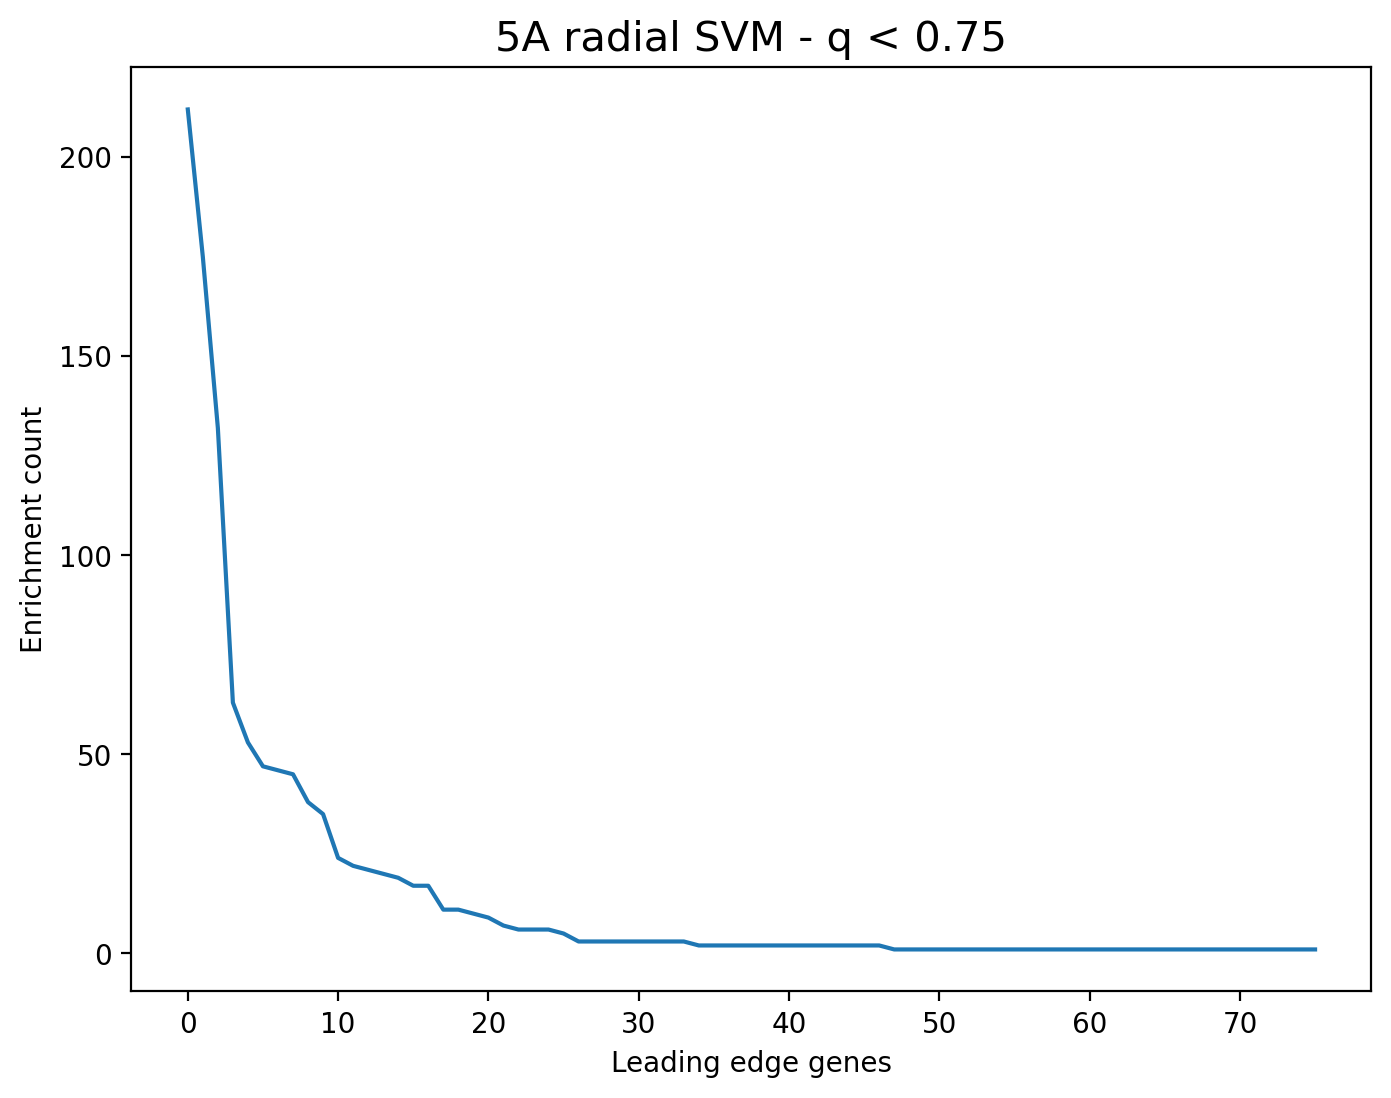

In [45]:
plt.rcParams['figure.figsize'] = (8, 6)
#plt.yscale("log") 
#set axes limit
#plt.ylim(0.001, 1000)
plt.plot(lead_genes_5A_radsvm_q075_KEGG_react_wiki, enrichment_count_5A_radsvm_q075_KEGG_react_wiki)
plt.xlabel("Leading edge genes", fontsize=10)
plt.ylabel("Enrichment count", fontsize=10)
plt.title("5A radial SVM - q < 0.75", fontsize=15)
plt.show()

In [46]:
mutated_gene_names_5A_radsvm_q075_KEGG_react_wiki = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted.index.tolist()

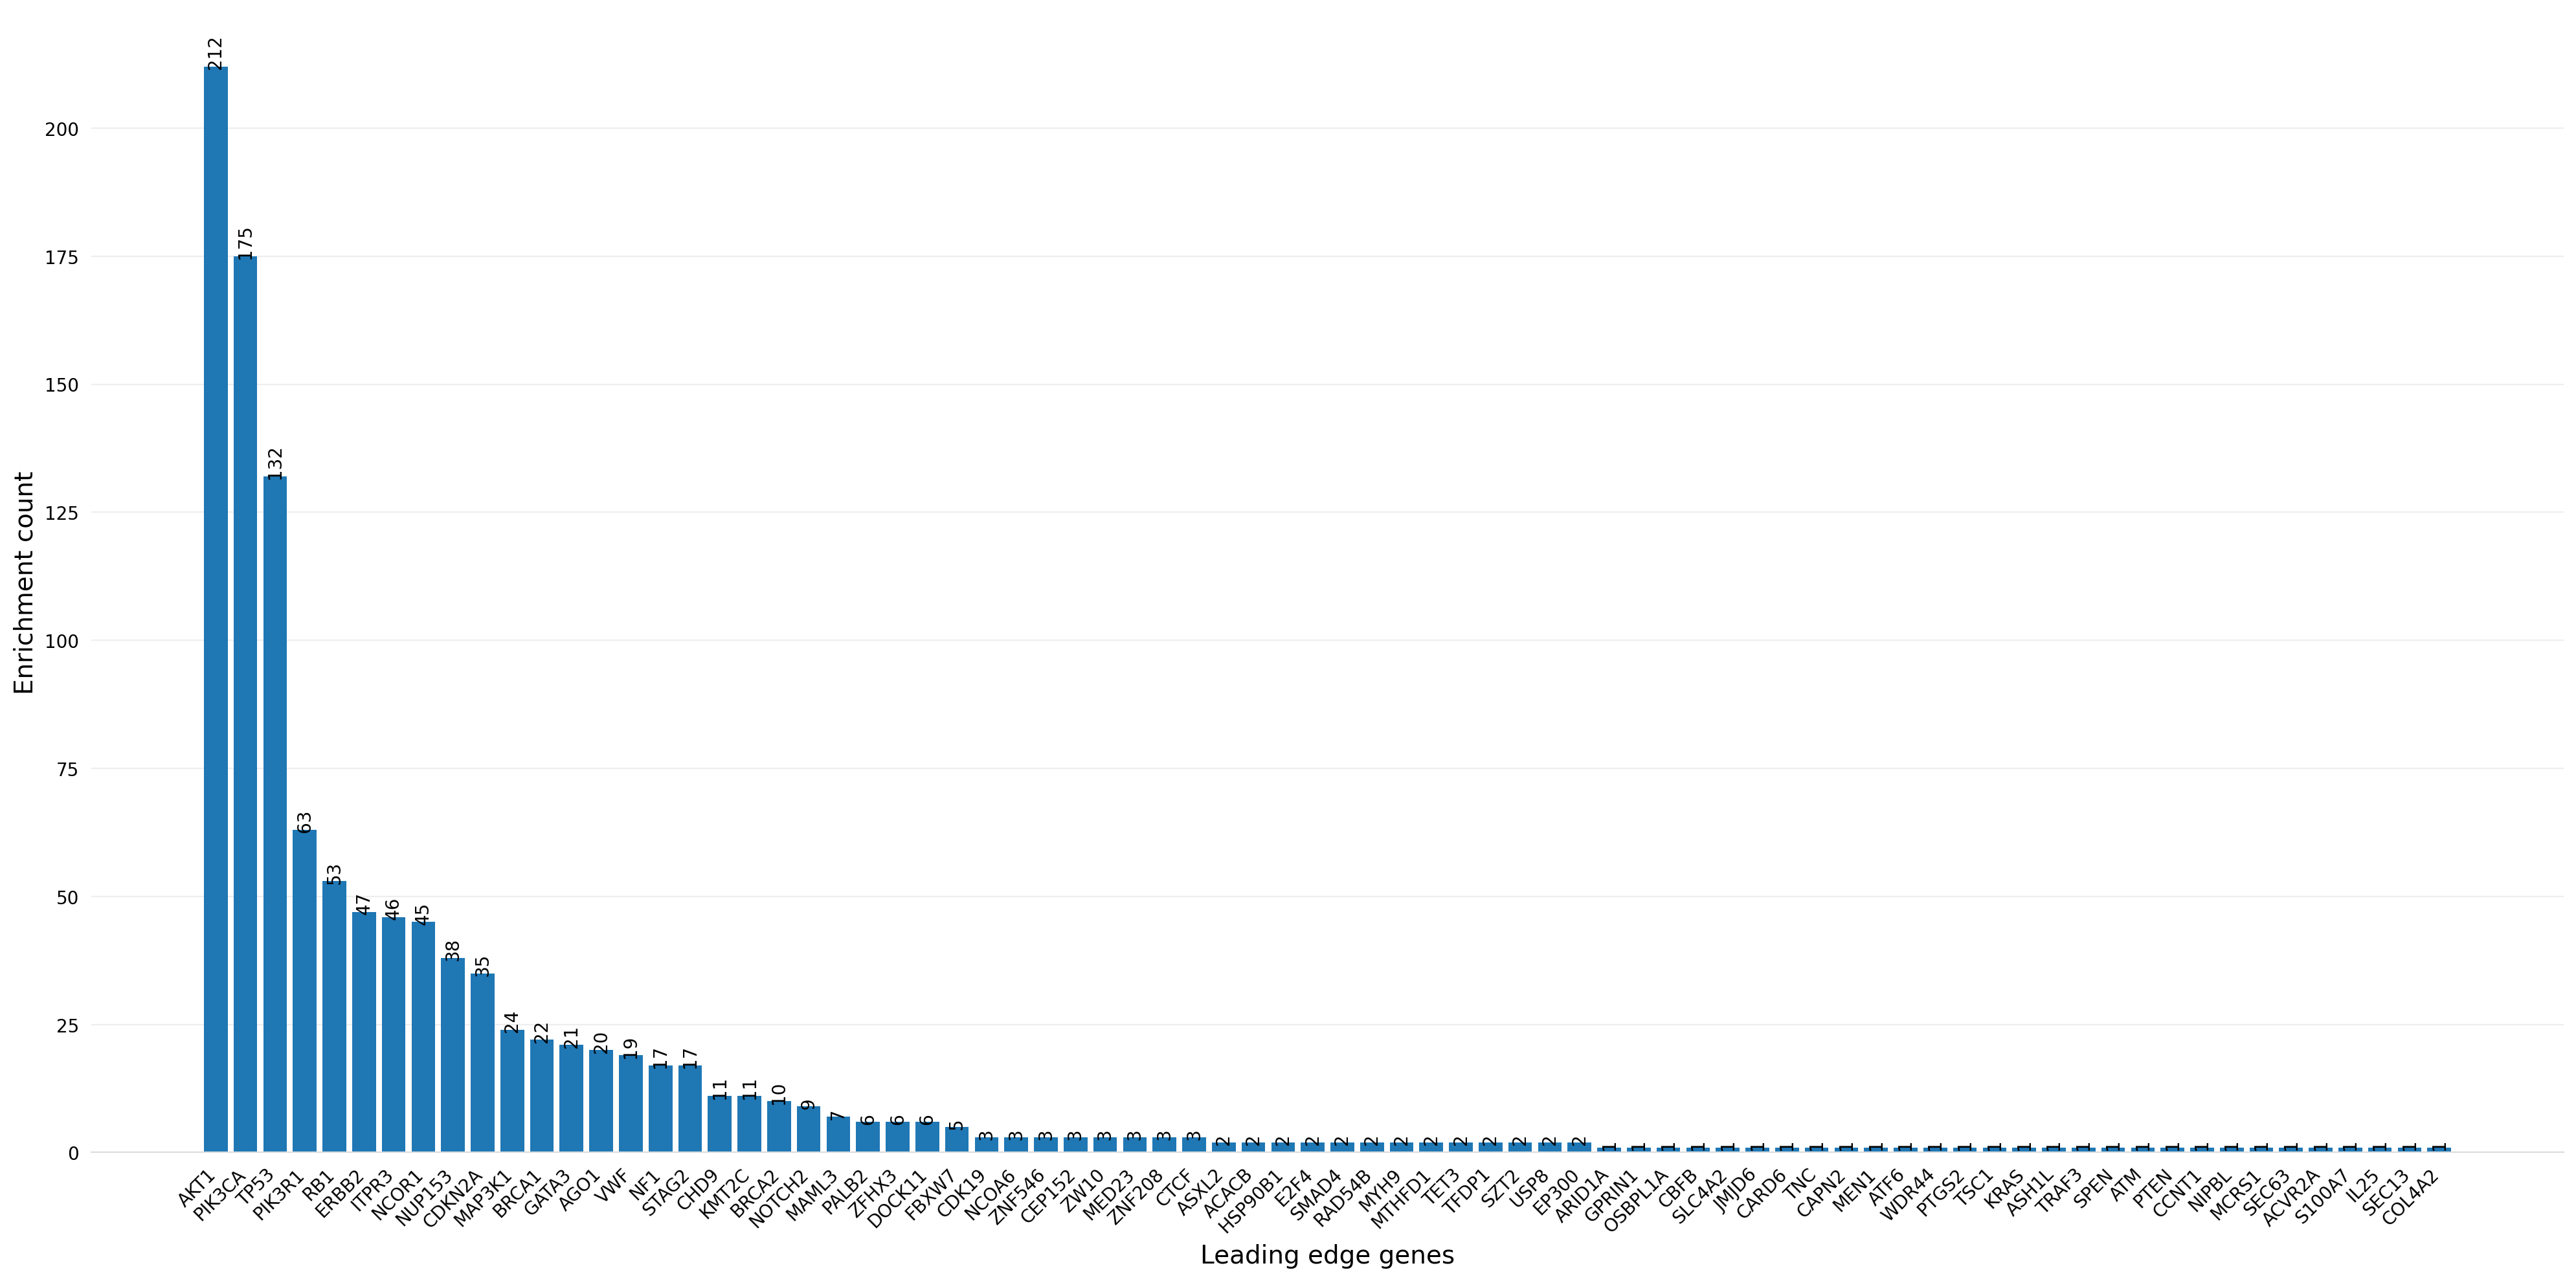

In [47]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted.index, occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted['EnrichmentCount'], label=mutated_gene_names_5A_radsvm_q075_KEGG_react_wiki)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_5A_radsvm_q075_KEGG_react_wiki,  ha='right', rotation=45)
#plt.title('Highest mutated genes', fontsize=14)
plt.xlabel('Leading edge genes', fontsize=14)
plt.ylabel('Enrichment count', fontsize=14)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center'
  )


fig.tight_layout()

## Selecting the genes of higher interest

In [48]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted

,EnrichmentCount
TP53,12
CDKN2A,7
ASXL2,7
CHD9,7
NUP153,6
AKT1,5
GATA3,5
BRCA1,5
CTCF,4
ERBB2,4


In [49]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED = occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted.loc[occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted['EnrichmentCount'] > 2]
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED

,EnrichmentCount
TP53,12
CDKN2A,7
ASXL2,7
CHD9,7
NUP153,6
AKT1,5
GATA3,5
BRCA1,5
CTCF,4
ERBB2,4


In [50]:
# save
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED.to_csv('5A_enrichment_count_msigdb.txt', index=True, sep='\t')

In [51]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED.shape

(14, 1)

In [52]:
mutated_gene_names_5A_radsvm_q075_msigDB_SEL = occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED.index.tolist()

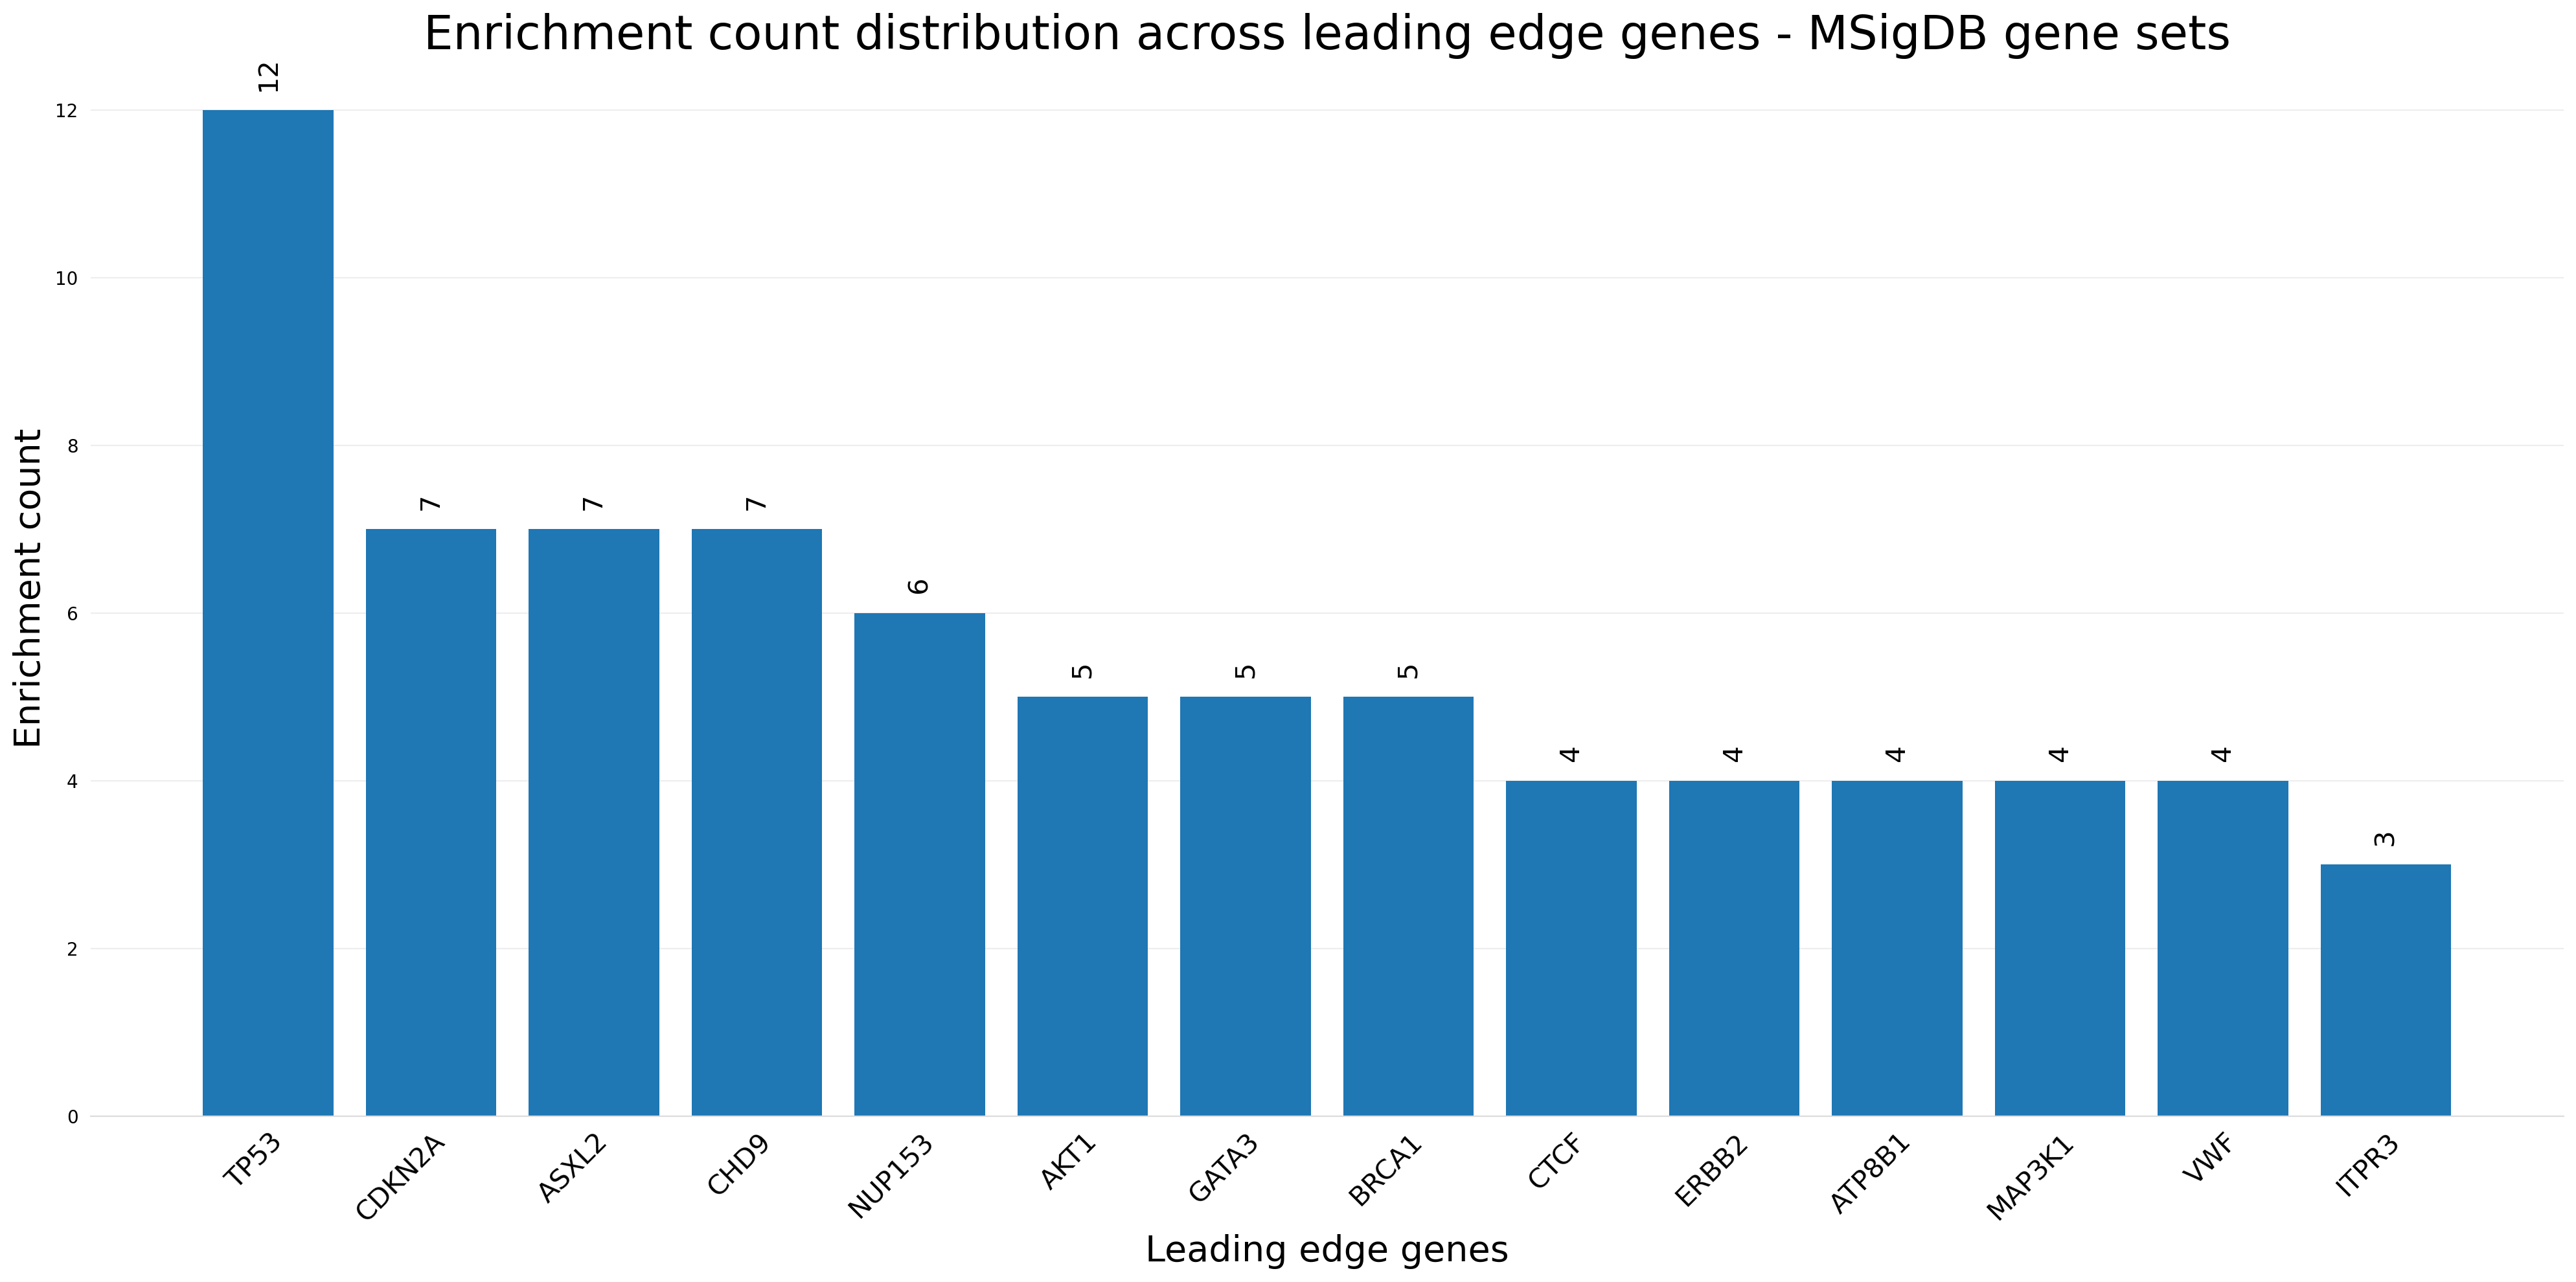

In [53]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED.index, occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED['EnrichmentCount'], label=mutated_gene_names_5A_radsvm_q075_msigDB_SEL)
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_5A_radsvm_q075_msigDB_SEL,  ha='right', rotation=45, fontsize=15)
plt.title('Enrichment count distribution across leading edge genes - MSigDB gene sets', fontsize=26)
plt.xlabel('Leading edge genes', fontsize=20)
plt.ylabel('Enrichment count', fontsize=20)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center',
      fontsize=15
  )


fig.tight_layout()

In [54]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted

,EnrichmentCount
AKT1,212
PIK3CA,175
TP53,132
PIK3R1,63
RB1,53
...,...
ACVR2A,1
S100A7,1
IL25,1
SEC13,1


In [55]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted.loc[occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted['EnrichmentCount'] > 5]
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED

,EnrichmentCount
AKT1,212
PIK3CA,175
TP53,132
PIK3R1,63
RB1,53
ERBB2,47
ITPR3,46
NCOR1,45
NUP153,38
CDKN2A,35


In [56]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.shape

(25, 1)

In [57]:
# save
os.chdir("C:/Users/Cristina/OneDrive/Documenti/BCG/Tesi")
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.to_csv('5A_enrichment_count_KEGG_react_wiki_genes.txt', index=True, sep='\t')

In [58]:
mutated_gene_names_5A_radsvm_q075_KEGG_react_wiki_SEL = occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.index.tolist()

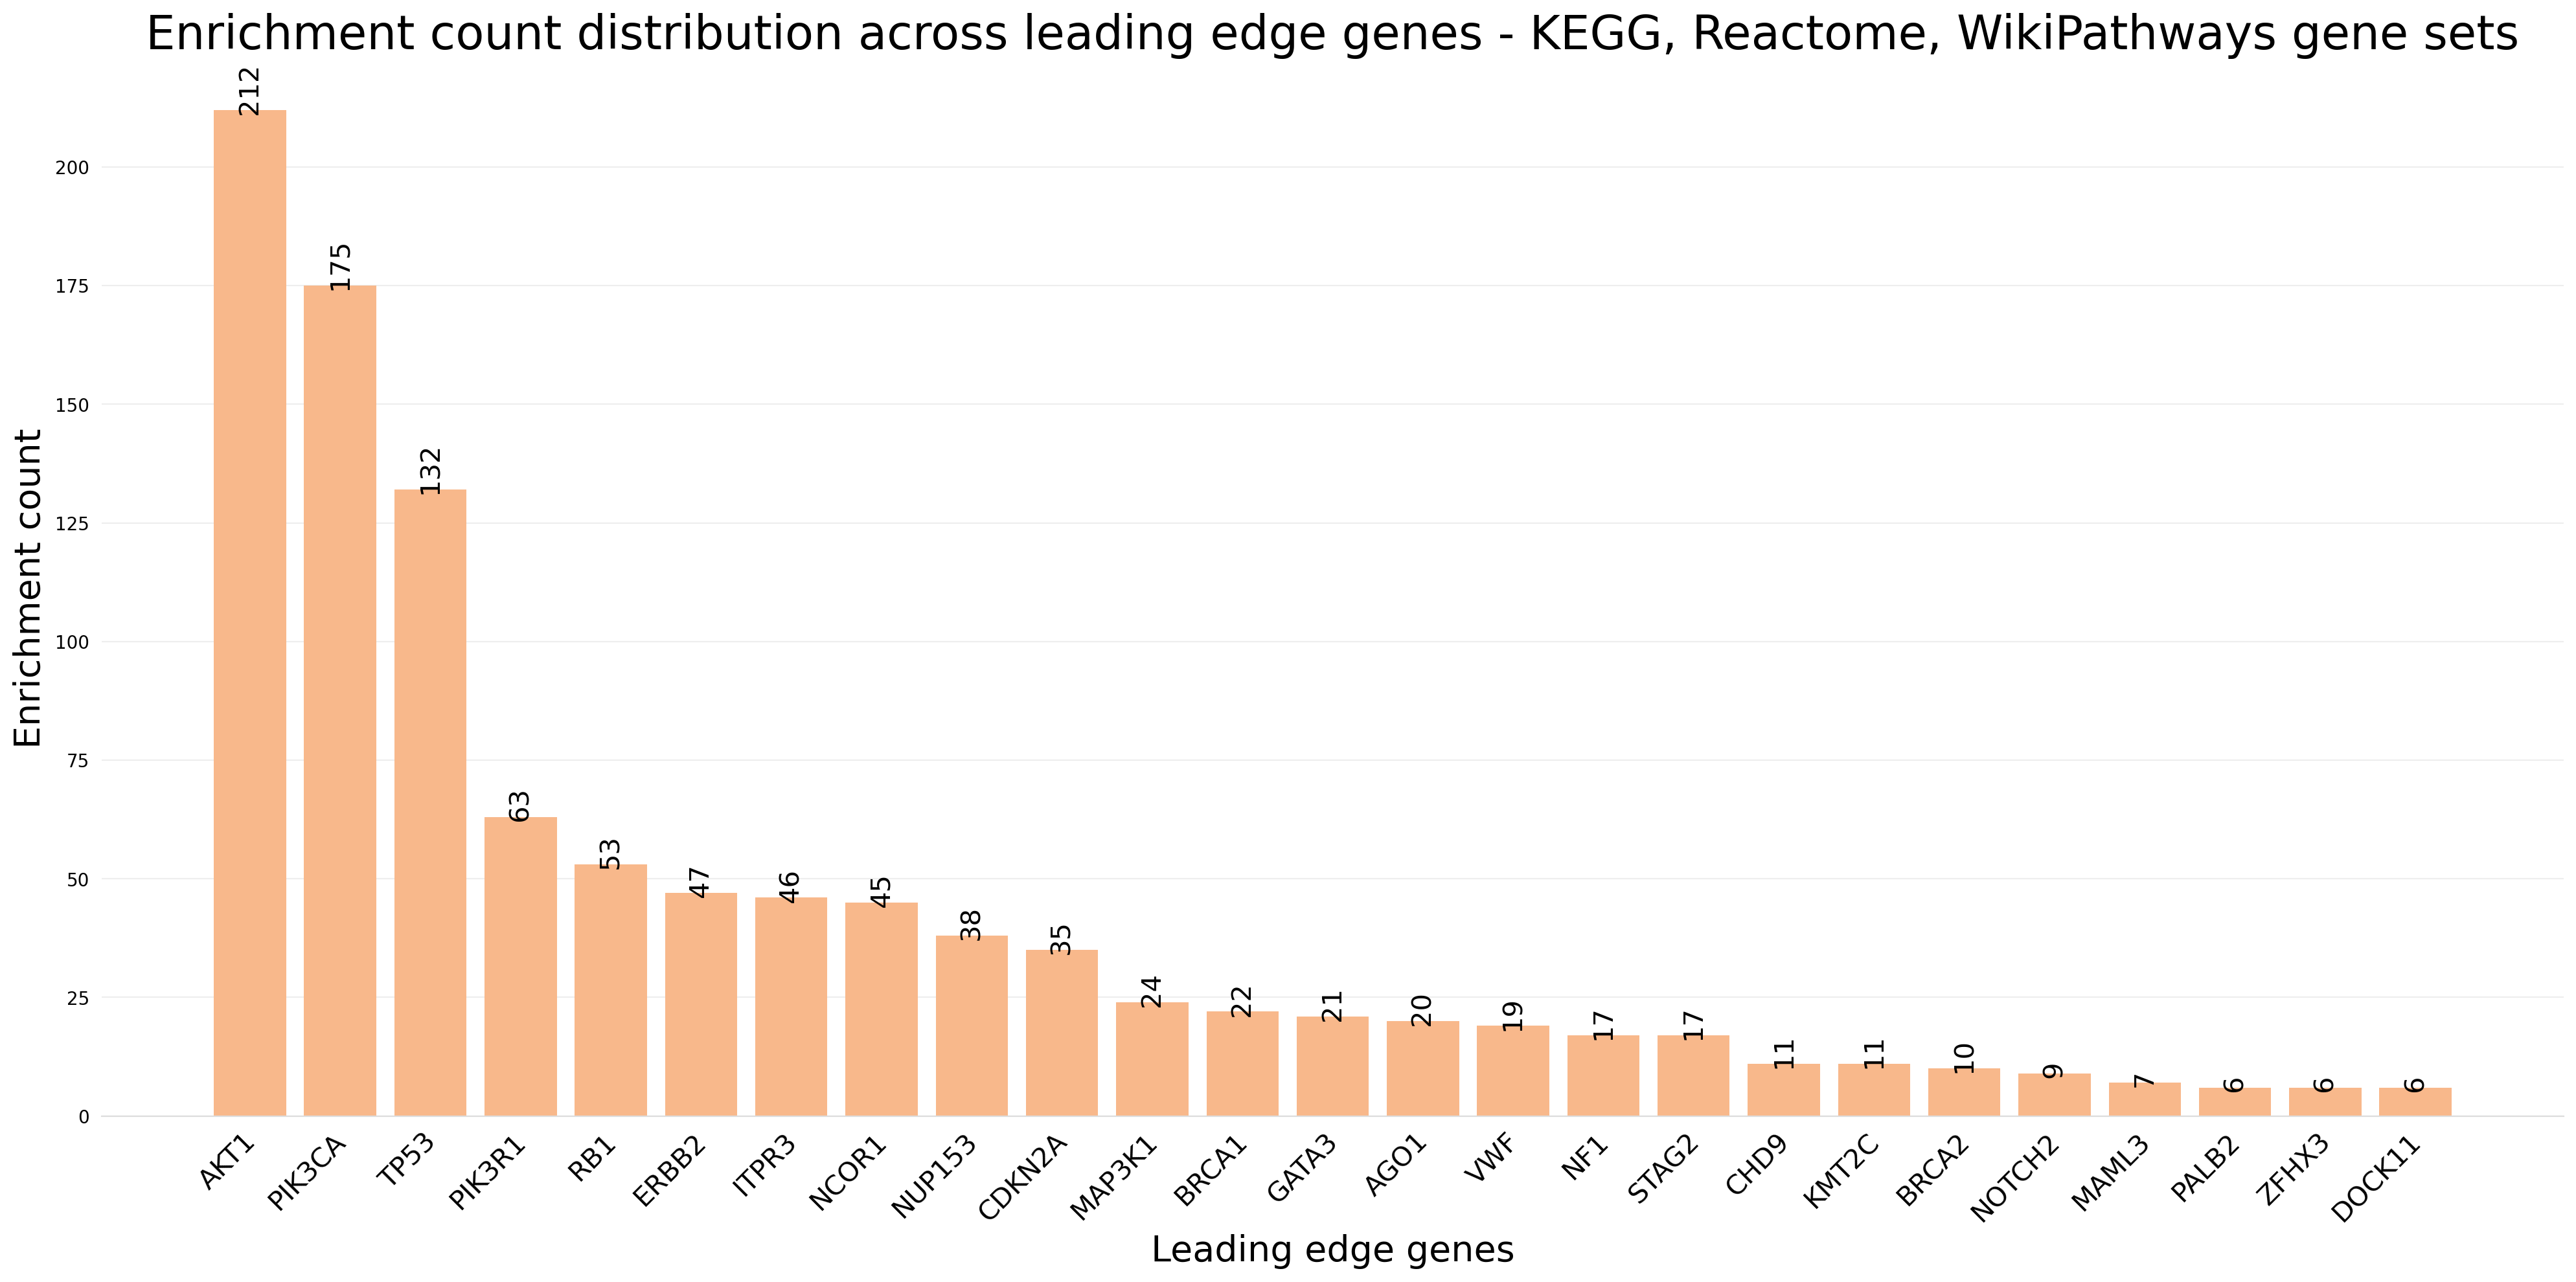

In [59]:
# increase the quality and resolution of the chart
%config InlineBackend.figure_format = 'retina'
from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('retina', quality=100)
# set default figure size.
plt.rcParams['figure.figsize'] = (20, 10)
fig, ax = plt.subplots()
h=ax.bar(occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED.index, occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED['EnrichmentCount'], label=mutated_gene_names_5A_radsvm_q075_KEGG_react_wiki_SEL, color='#F8B88B')
xticks_pos = [0.65*patch.get_width() + patch.get_xy()[0] for patch in h]

_ = plt.xticks(xticks_pos, mutated_gene_names_5A_radsvm_q075_KEGG_react_wiki_SEL,  ha='right', rotation=45, fontsize=15)
plt.title('Enrichment count distribution across leading edge genes - KEGG, Reactome, WikiPathways gene sets', fontsize=26)
plt.xlabel('Leading edge genes', fontsize=20)
plt.ylabel('Enrichment count', fontsize=20)


# First, let's remove the top, right and left spines (figure borders)
# which really aren't necessary for a bar chart.
# Also, make the bottom spine gray instead of black.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')

# Second, remove the ticks as well.
ax.tick_params(bottom=False, left=False)

# Third, add a horizontal grid (but keep the vertical grid hidden).
# Color the lines a light gray as well.
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

# Add text annotations to the top of the bars.
# Note, you'll have to adjust this slightly (the 0.3)
# with different data.
for bar in h:
  ax.text(
      bar.get_x() + bar.get_width() / 2,
      bar.get_height() + 0.3,
      round(bar.get_height(), 1),
      rotation='vertical',
      horizontalalignment='center',
      fontsize=15
  )


fig.tight_layout()

### Intersection between MsigDB genes and pathway genes

In [60]:
occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED

,EnrichmentCount
AKT1,212
PIK3CA,175
TP53,132
PIK3R1,63
RB1,53
ERBB2,47
ITPR3,46
NCOR1,45
NUP153,38
CDKN2A,35


In [61]:
occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED

,EnrichmentCount
TP53,12
CDKN2A,7
ASXL2,7
CHD9,7
NUP153,6
AKT1,5
GATA3,5
BRCA1,5
CTCF,4
ERBB2,4


In [62]:
pd.merge(occurrence_matrix_5A_radsvm_q075_KEGG_react_wiki_genes_df_sorted_SELECTED, occurrence_matrix_5A_radsvm_q075_msigDB_genes_df_sorted_SELECTED, left_index=True, right_index=True, how='inner')

,EnrichmentCount_x,EnrichmentCount_y
AKT1,212,5
TP53,132,12
ERBB2,47,4
ITPR3,46,3
NUP153,38,6
CDKN2A,35,7
MAP3K1,24,4
BRCA1,22,5
GATA3,21,5
VWF,19,4
